In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.cm as cmx

In [32]:
summaryBatch = pd.read_json("./summaryBatch.json")

In [33]:
batch = pd.read_json("./batch.json")

In [34]:
summaryBatch

,k in,k out,m1,m2
0,1,1,1.371114,1.284301
1,2,2,1.000087,1.010060
2,3,3,1.004611,1.059125
3,4,4,1.013238,1.035063
4,5,5,1.034872,1.085610


In [35]:
norm = colors.Normalize(vmin=0, vmax=1000)

#colormap possible values = viridis, jet, spectral
rgba_color = cm.gnuplot(norm(400),bytes=True)
rgba_color

(161, 16, 149, 255)

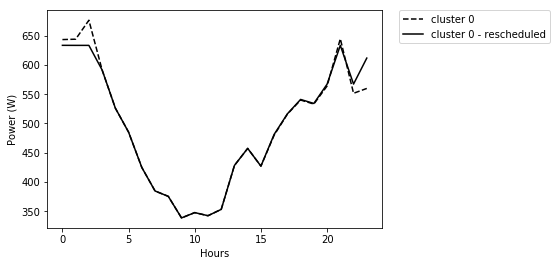

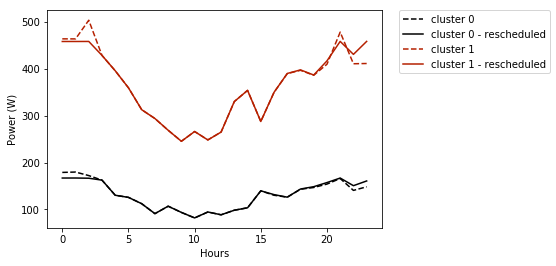

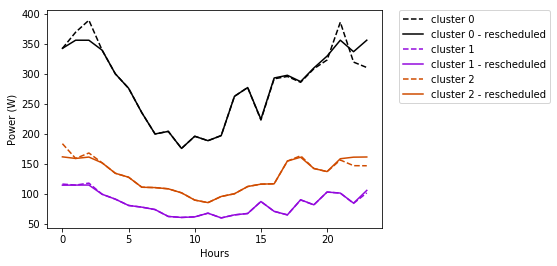

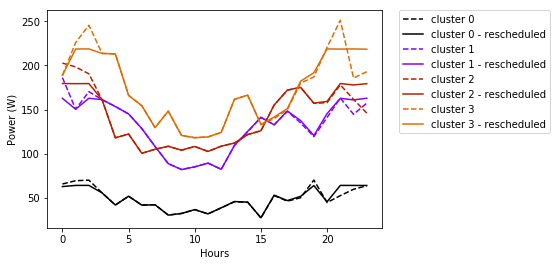

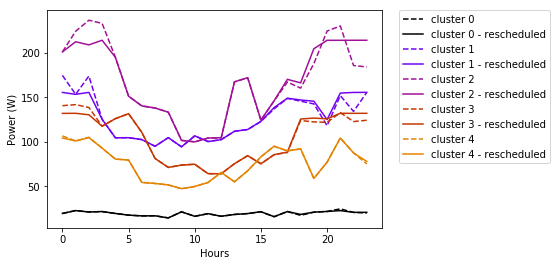

In [36]:
for runIdx in range(0, len(batch)):
    fig, ax = plt.subplots()
    clusters_step1 = batch.iloc[runIdx]["steps"][0]["clusters"]
    clusters_step2 = batch.iloc[runIdx]["steps"][1]["clusters"]
    norm = colors.Normalize(vmin=0, vmax=len(clusters_step1))
    for cIdx in range(0, len(clusters_step1)):
        rgba_color = cm.gnuplot(norm(cIdx))
        ax.plot(clusters_step1[cIdx]["syntheticCenter"], "--", color=rgba_color, label="cluster %s" % cIdx)
        ax.plot(clusters_step2[cIdx]["syntheticCenter"], color=rgba_color, label="cluster %s - rescheduled" % cIdx)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax.set(xlabel='Hours', ylabel='Power (W)',title='')
    plt.show()